In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import time

from datetime import datetime
from config import weather_api_key

In [2]:
# create random latitudes & longitudes

latitudes = np.random.uniform(-90.0, 90.0, size=1500)

longitudes = np.random.uniform(-180.0, 180.0, size=1500)

# combine the latitudes & longitudes

coords = zip(latitudes, longitudes)

coords

In [3]:
coordinates = list(coords)

In [4]:
# print to make sure it is correctly unzipped into list

for coordinate in coordinates:
    
    print(coordinate[0], coordinate[1])

-53.18318454333519 -109.88260993073308
-24.705550764739698 -120.14332508603212
-60.91156747120786 -88.23012160947648
-44.29144536499985 27.092430159947895
-49.730384119021366 48.9639913375523
-10.783480681986546 12.229658527082677
46.48815668287591 -127.79772160145168
7.004775131760837 21.702989595327523
-35.397459654185894 -62.46741016797907
-41.393227887971804 175.94625888832405
43.36738694260555 28.54042985253932
15.17777759934394 -19.310893462758628
42.813202859401855 -117.50727308453581
34.096762235159304 178.96511556273265
4.292514093363323 0.611041524193439
18.912349677949706 -51.14792926382731
-18.81160236842443 150.3600673687136
45.01049865205002 46.89073648576482
-61.973491166342 51.41481703406788
87.47021738422697 103.3679584620943
12.713512273255702 177.36685561484995
-86.86663325064764 -25.99461063328701
9.759859149795744 -65.15109054587136
15.517303678705261 -18.396940908420618
-43.40268048624332 28.25233594460613
-62.16806825672853 120.81845655855165
-43.22968084350766 -

-53.3879790289958 -142.58529621840307
-12.326953848170106 0.048041751261735044
-52.276784376081274 49.51347893821739
41.60653710515757 50.68538099669678
78.687603826674 96.74294952362385
-16.491838480023034 -12.390497992975384
1.4152958644291544 -98.68856155448148
83.39518364148387 16.110302850111765
-1.7725945229208264 166.66963269312708
68.45521187376724 -177.90220740101995
-66.57197632149727 117.86804540071205
-33.17483796012284 -25.66089922655962
-50.98830784085107 163.6091628419553
67.75336656122255 44.06138265771881
-55.96593138167523 2.185291130461536
-21.224947097722065 -27.914159449526665
-64.43401938278481 2.755779395472814
-75.13997529013531 -170.689610182758
71.46529596164132 143.83738710602495
33.790029958291726 103.63833520262068
22.757608834684007 151.6734964582094
-0.7548962434826336 123.26560695926872
11.185850058538747 -101.01339063298752
38.16630992665668 -130.61877138165772
-76.20543668034368 -116.6694582124062
56.11484779491215 -41.315044876470154
60.22623152043889

In [5]:
from citipy import citipy

In [6]:
# create empty list

cities = []

# identify the nearest city for each lat & long

for coordinate in coordinates:
    
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, add to city list
    
    if city not in cities:
        
        cities.append(city)
        
# print city count to confirm 1500+

len(cities)

624

In [7]:
# build out URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# create an empty list to hold the weather data

city_data = []

# print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# create counters

record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# loop through all the cities in the list

for i, city in enumerate(cities):

    # group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")

    # log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | castro
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | port elizabeth
Processing Record 5 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 6 of Set 1 | sumbe
Processing Record 7 of Set 1 | ucluelet
Processing Record 8 of Set 1 | bria
Processing Record 9 of Set 1 | lincoln
Processing Record 10 of Set 1 | waipawa
Processing Record 11 of Set 1 | sabla
Processing Record 12 of Set 1 | dakar
Processing Record 13 of Set 1 | caldwell
Processing Record 14 of Set 1 | nikolskoye
Processing Record 15 of Set 1 | tema
Processing Record 16 of Set 1 | bathsheba
Processing Record 17 of Set 1 | bowen
Processing Record 18 of Set 1 | kaspiyskiy
Processing Record 19 of Set 1 | khatanga
Processing Record 20 of Set 1 | butaritari
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | zaraza
Processing Record 23 of Set 1 | albany
Processing Record 24 of Set 1 | jamestown
Processin

Processing Record 42 of Set 4 | alta floresta
Processing Record 43 of Set 4 | san patricio
Processing Record 44 of Set 4 | pisco
Processing Record 45 of Set 4 | airai
Processing Record 46 of Set 4 | lake havasu city
Processing Record 47 of Set 4 | vysokogornyy
Processing Record 48 of Set 4 | ulagan
Processing Record 49 of Set 4 | kavaratti
Processing Record 50 of Set 4 | birao
Processing Record 1 of Set 5 | srednekolymsk
Processing Record 2 of Set 5 | vanimo
Processing Record 3 of Set 5 | manta
Processing Record 4 of Set 5 | rio grande
Processing Record 5 of Set 5 | cao bang
Processing Record 6 of Set 5 | nantucket
Processing Record 7 of Set 5 | sola
Processing Record 8 of Set 5 | mount isa
Processing Record 9 of Set 5 | akdepe
Processing Record 10 of Set 5 | kyra
Processing Record 11 of Set 5 | mawlamyine
Processing Record 12 of Set 5 | tomatlan
Processing Record 13 of Set 5 | caravelas
Processing Record 14 of Set 5 | havoysund
Processing Record 15 of Set 5 | san fernando
Processing R

Processing Record 34 of Set 8 | wick
Processing Record 35 of Set 8 | marsh harbour
Processing Record 36 of Set 8 | bonavista
Processing Record 37 of Set 8 | barra patuca
Processing Record 38 of Set 8 | diamantino
Processing Record 39 of Set 8 | tarudant
City not found. Skipping...
Processing Record 40 of Set 8 | hobyo
Processing Record 41 of Set 8 | luganville
Processing Record 42 of Set 8 | kenitra
Processing Record 43 of Set 8 | liepaja
Processing Record 44 of Set 8 | belaya gora
Processing Record 45 of Set 8 | show low
Processing Record 46 of Set 8 | kologriv
Processing Record 47 of Set 8 | sehithwa
Processing Record 48 of Set 8 | atambua
Processing Record 49 of Set 8 | nhulunbuy
Processing Record 50 of Set 8 | kota bahru
Processing Record 1 of Set 9 | hamilton
Processing Record 2 of Set 9 | vila velha
Processing Record 3 of Set 9 | tocopilla
Processing Record 4 of Set 9 | la algaba
Processing Record 5 of Set 9 | haifa
Processing Record 6 of Set 9 | lufilufi
Processing Record 7 of S

Processing Record 17 of Set 12 | lorengau
Processing Record 18 of Set 12 | deer lake
Processing Record 19 of Set 12 | nouadhibou
Processing Record 20 of Set 12 | mbandaka
Processing Record 21 of Set 12 | jinchengjiang
City not found. Skipping...
Processing Record 22 of Set 12 | urubamba
Processing Record 23 of Set 12 | knysna
Processing Record 24 of Set 12 | lebyazhye
Processing Record 25 of Set 12 | bandarbeyla
Processing Record 26 of Set 12 | horta
Processing Record 27 of Set 12 | riviere-au-renard
Processing Record 28 of Set 12 | nuuk
Processing Record 29 of Set 12 | sungaipenuh
Processing Record 30 of Set 12 | mouila
Processing Record 31 of Set 12 | changli
Processing Record 32 of Set 12 | oktyabrskiy
Processing Record 33 of Set 12 | ailigandi
Processing Record 34 of Set 12 | acajutla
Processing Record 35 of Set 12 | alice springs
Processing Record 36 of Set 12 | raga
Processing Record 37 of Set 12 | muncar
Processing Record 38 of Set 12 | prokopyevsk
Processing Record 39 of Set 12

In [14]:
len(city_data)

558

In [15]:
# taking a peek at the list of dictionaries that was created
# first 5 entries
city_data[0:5]

[{'City': 'Hobart',
  'Lat': -42.8794,
  'Lng': 147.3294,
  'Max Temp': 62.06,
  'Humidity': 72,
  'Cloudiness': 40,
  'Wind Speed': 4.61,
  'Country': 'AU',
  'Date': '2022-05-14 23:10:33'},
 {'City': 'Vaini',
  'Lat': -21.2,
  'Lng': -175.2,
  'Max Temp': 74.19,
  'Humidity': 67,
  'Cloudiness': 98,
  'Wind Speed': 16.13,
  'Country': 'TO',
  'Date': '2022-05-14 23:14:57'},
 {'City': 'Kodiak',
  'Lat': 57.79,
  'Lng': -152.4072,
  'Max Temp': 49.51,
  'Humidity': 46,
  'Cloudiness': 40,
  'Wind Speed': 13.8,
  'Country': 'US',
  'Date': '2022-05-14 23:14:58'},
 {'City': 'Chapais',
  'Lat': 49.7834,
  'Lng': -74.8492,
  'Max Temp': 73.69,
  'Humidity': 60,
  'Cloudiness': 100,
  'Wind Speed': 8.19,
  'Country': 'CA',
  'Date': '2022-05-14 23:14:58'},
 {'City': 'Mataura',
  'Lat': -46.1927,
  'Lng': 168.8643,
  'Max Temp': 48.47,
  'Humidity': 75,
  'Cloudiness': 63,
  'Wind Speed': 3,
  'Country': 'NZ',
  'Date': '2022-05-14 23:14:59'}]

In [16]:
# convert the array of dictionaries to a DataFrame
city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.8794,147.3294,62.06,72,40,4.61,AU,2022-05-14 23:10:33
1,Vaini,-21.2000,-175.2000,74.19,67,98,16.13,TO,2022-05-14 23:14:57
2,Kodiak,57.7900,-152.4072,49.51,46,40,13.80,US,2022-05-14 23:14:58
3,Chapais,49.7834,-74.8492,73.69,60,100,8.19,CA,2022-05-14 23:14:58
4,Mataura,-46.1927,168.8643,48.47,75,63,3.00,NZ,2022-05-14 23:14:59
5,Norman Wells,65.2820,-126.8329,41.45,87,100,9.48,CA,2022-05-14 23:14:59
6,Khirkiya,22.1674,76.8605,89.87,33,25,7.58,IN,2022-05-14 23:14:59
7,Yatou,37.1500,122.3833,58.21,32,1,2.75,CN,2022-05-14 23:15:00
8,Rikitea,-23.1203,-134.9692,76.26,71,2,20.60,PF,2022-05-14 23:15:00
9,Cherskiy,68.7500,161.3000,27.27,90,100,15.86,RU,2022-05-14 23:15:00


In [17]:
# re-order the columns of DataFrame
ordered_cols = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

city_data_df = city_data_df[ordered_cols]

In [18]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hobart,AU,2022-05-14 23:10:33,-42.8794,147.3294,62.06,72,40,4.61
1,Vaini,TO,2022-05-14 23:14:57,-21.2000,-175.2000,74.19,67,98,16.13
2,Kodiak,US,2022-05-14 23:14:58,57.7900,-152.4072,49.51,46,40,13.80
3,Chapais,CA,2022-05-14 23:14:58,49.7834,-74.8492,73.69,60,100,8.19
4,Mataura,NZ,2022-05-14 23:14:59,-46.1927,168.8643,48.47,75,63,3.00
5,Norman Wells,CA,2022-05-14 23:14:59,65.2820,-126.8329,41.45,87,100,9.48
6,Khirkiya,IN,2022-05-14 23:14:59,22.1674,76.8605,89.87,33,25,7.58
7,Yatou,CN,2022-05-14 23:15:00,37.1500,122.3833,58.21,32,1,2.75
8,Rikitea,PF,2022-05-14 23:15:00,-23.1203,-134.9692,76.26,71,2,20.60
9,Cherskiy,RU,2022-05-14 23:15:00,68.7500,161.3000,27.27,90,100,15.86


In [19]:
# create output file (CSV)

output_data_file = "weather_data/cities.csv"

# export the City_Data into a CSV

city_data_df.to_csv(output_data_file, index_label="City_ID")

# STEM side-project with same data compiled

In [20]:
# extract relevant fields from the DataFrame for plotting

lats = city_data_df['Lat']

max_temps = city_data_df['Max Temp']

humidity = city_data_df['Humidity']

cloudiness = city_data_df['Cloudiness']

wind_speed = city_data_df['Wind Speed']

## Latitude vs Max Temperature

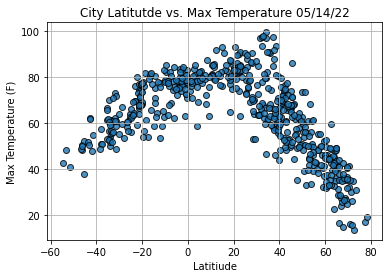

In [21]:
# import time module
import time

# build the scatter plot for lat vs max temp

plt.scatter(lats,
           max_temps,
           edgecolor='k', linewidth=1, marker='o',
           alpha=0.8, label='Cities')

# incorporate additional graph properties

plt.title(f"City Latitutde vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitiude")
plt.grid(True)

# save the figure
plt.savefig("weather_data/lat_vs_max_temp.png")

# show plot
plt.show()

## Latitude vs Humidity

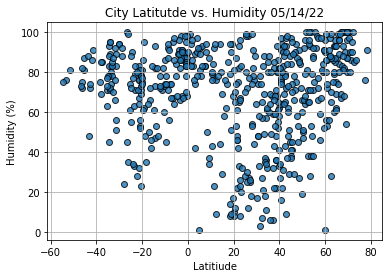

In [22]:
# build the scatter plot for lat vs max temp

plt.scatter(lats,
           humidity,
           edgecolor='k', linewidth=1, marker='o',
           alpha=0.8, label='Cities')

# incorporate additional graph properties

plt.title(f"City Latitutde vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitiude")
plt.grid(True)

# save the figure
plt.savefig("weather_data/lat_vs_humidity.png")

# show plot
plt.show()

# Latitude vs Cloudiness

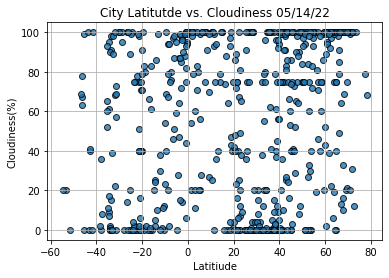

In [23]:
# build the scatter plot for lat vs max temp

plt.scatter(lats,
           cloudiness,
           edgecolor='k', linewidth=1, marker='o',
           alpha=0.8, label='Cities')

# incorporate additional graph properties

plt.title(f"City Latitutde vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitiude")
plt.grid(True)

# save the figure
plt.savefig("weather_data/lat_vs_cloudiness.png")

# show plot
plt.show()

# Latitude vs Wind Speed

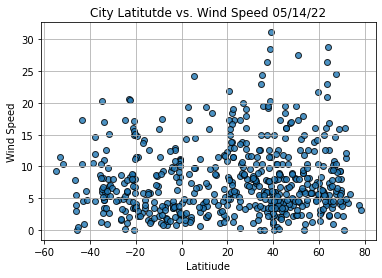

In [24]:
# build the scatter plot for lat vs max temp

plt.scatter(lats,
           wind_speed,
           edgecolor='k', linewidth=1, marker='o',
           alpha=0.8, label='Cities')

# incorporate additional graph properties

plt.title(f"City Latitutde vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitiude")
plt.grid(True)

# save the figure
plt.savefig("weather_data/lat_vs_wind_speed.png")

# show plot
plt.show()

# create a function

In [25]:
# Import linregress
from scipy.stats import linregress

In [26]:
# perform linear regression on the weather data and plot a regression line 

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
     # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [27]:
index13 = city_data_df.loc[13]

index13

City                       Barrow
Country                        US
Date          2022-05-14 23:15:02
Lat                       71.2906
Lng                     -156.7887
Max Temp                    30.22
Humidity                       86
Cloudiness                    100
Wind Speed                  16.11
Name: 13, dtype: object

# create Dataframes for northern & southern hemisphere 
### filter with .loc based on latitude being less than/greater than zero '0'

In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# latitude and max temp correlation

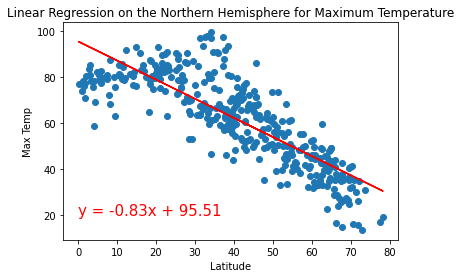

In [32]:
# linear regression on the Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# call the function

plot_linear_regression(x_values, 
                       y_values,
                      'Linear Regression on the Northern Hemisphere for Maximum Temperature',
                      'Max Temp', 
                       (0,20))

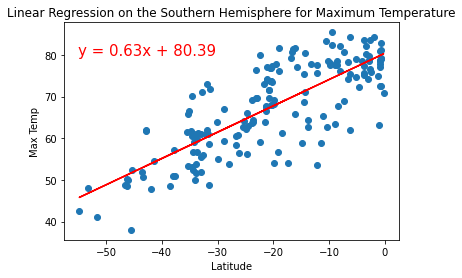

In [34]:
# linear regression on the Southern Hemisphere

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# call the function

plot_linear_regression(x_values, 
                       y_values,
                      'Linear Regression on the Southern Hemisphere for Maximum Temperature',
                      'Max Temp', 
                       (-55,80))

# latitude and hummidity correlation

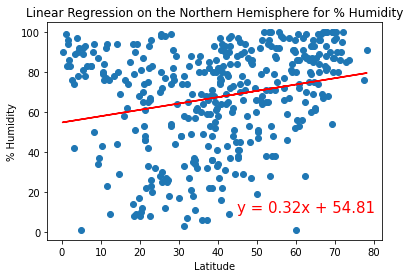

In [38]:
# linear regression on the Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# call the function

plot_linear_regression(x_values, 
                       y_values,
                      'Linear Regression on the Northern Hemisphere for % Humidity',
                      '% Humidity', 
                       (45,10))

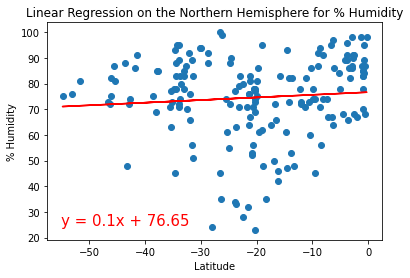

In [42]:
# linear regression on the Southern Hemisphere

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# call the function

plot_linear_regression(x_values, 
                       y_values,
                      'Linear Regression on the Northern Hemisphere for % Humidity',
                      '% Humidity', 
                       (-55,25))

# latitude and cloudiness correlation

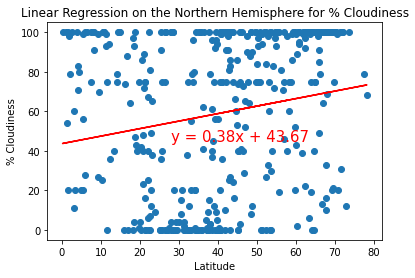

In [50]:
# linear regression on the Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# call the function

plot_linear_regression(x_values, 
                       y_values,
                      'Linear Regression on the Northern Hemisphere for % Cloudiness',
                      '% Cloudiness', 
                       (28,45))

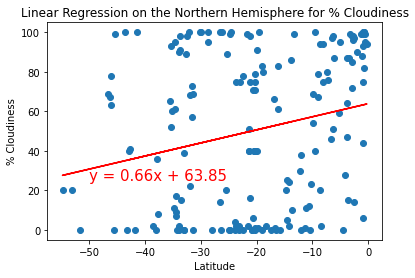

In [45]:
# linear regression on the Southern Hemisphere

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# call the function

plot_linear_regression(x_values, 
                       y_values,
                      'Linear Regression on the Northern Hemisphere for % Cloudiness',
                      '% Cloudiness', 
                       (-50,25))

# latitude and wind speed correlation

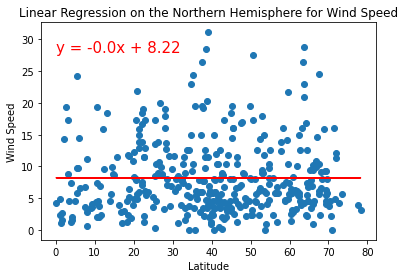

In [53]:
# linear regression on the Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# call the function

plot_linear_regression(x_values, 
                       y_values,
                      'Linear Regression on the Northern Hemisphere for Wind Speed',
                      'Wind Speed', 
                       (0,28))

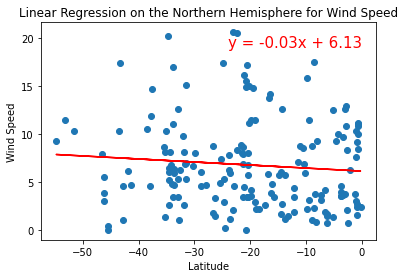

In [60]:
# linear regression on the Southern Hemisphere

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# call the function

plot_linear_regression(x_values, 
                       y_values,
                      'Linear Regression on the Northern Hemisphere for Wind Speed',
                      'Wind Speed', 
                       (-24,19))